In [1]:
import pandas as pd
import seaborn as sns

In [2]:
companies = pd.read_csv('DadosEmpresa.csv')
address = pd.read_csv('DadosEndereco.csv')

In [3]:
df = companies[companies['opcao_pelo_simples'] == 'SIM']
df.to_csv('Optam pelo simples.csv', index=False)

In [4]:
companies_address = companies.merge(address, left_on='cnpj', right_on='cnpj')
df = companies_address.query("capital_social > 5000 and (municipio == 'CURITIBA' or municipio == 'LONDRINA')")
df.to_csv("Curitiba e Londrina.csv", index=False)

<AxesSubplot:title={'center':'Quantidade de empresa por bairro em Curitiba'}, xlabel='bairro'>

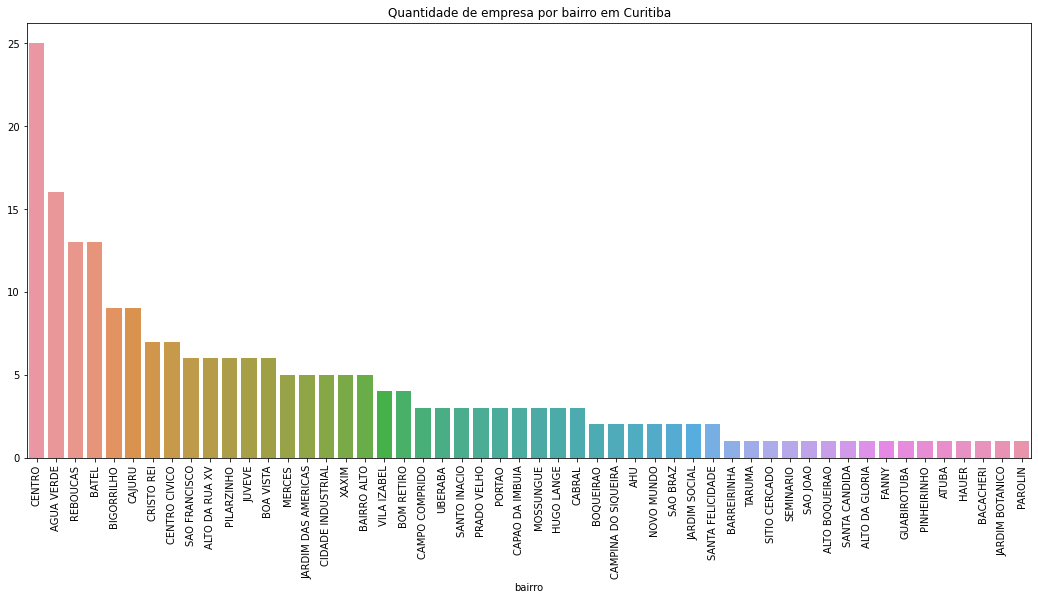

In [5]:
neighbourhood = companies_address[companies_address["municipio"] == "CURITIBA"].value_counts('bairro')
ax = sns.barplot(x = neighbourhood.index, y = neighbourhood.values)
ax.set_title("Quantidade de empresa por bairro em Curitiba")
ax.figure.set_size_inches(18,8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax

A seguinte visualização foi criada para analisar como o capital social das empresas esta distribuído pelas 3 cidades com a maior quantidade de empresas e com esse boxplot é possível visualizar o comportamento da variável.

In [6]:
companies_address.value_counts('municipio')
cities = ['CURITIBA','PORTO ALEGRE', 'FLORIANOPOLIS']
cities_df = companies_address[companies_address['municipio'].isin(cities)]
cities_df = cities_df[cities_df.capital_social > 0]

<AxesSubplot:xlabel='municipio', ylabel='capital_social'>

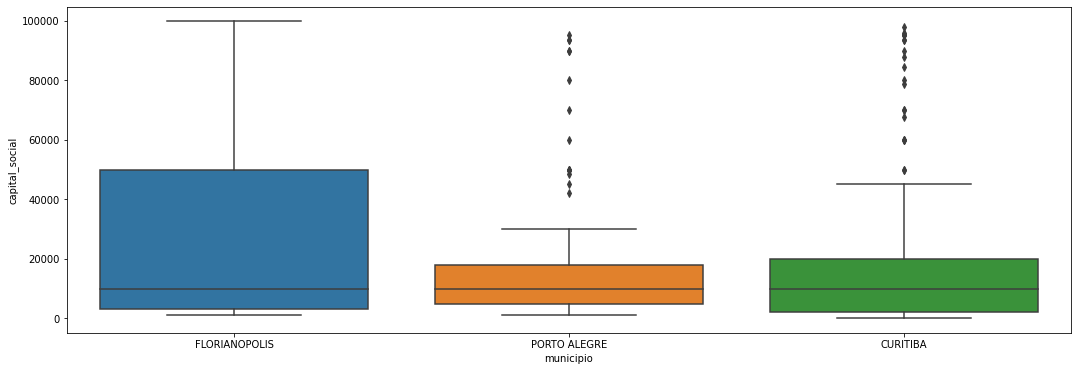

In [7]:
ax = sns.boxplot(x = 'municipio', y = 'capital_social', data=cities_df.query('capital_social < 100000'))
ax.figure.set_size_inches(18,6)
ax